# FIFA 21 Data Cleaning Challenge organized by [Promise Nonse](https://twitter.com/PromiseNonso_)

# Presented by [Olawuyi Olushola](twitter.com/JoseSholly), Nigeria

> **Here is a brief documentation for each column name in the given dataset:**

- photoUrl: The URL of the player's photo.
- LongName: The full name of the player.
- playerUrl: The URL of the player's page on sofifa.com.
- Nationality: The nationality of the player.
- Positions: The positions the player can play.
- Name: The short name of the player.
- Age: The age of the player.
- OVA: The overall rating of the player in FIFA 21.
- POT: The potential rating of the player in FIFA 21.
- Team & Contract: The team the player is playing for in FIFA 21, along with their contract details.
- ID: The unique identifier for the player.
- Height: The height of the player in feet and inches.
- Weight: The weight of the player in pounds.
- foot: The preferred foot of the player.
- BOV: The best overall rating the player has achieved in their career.
- BP: The best position the player has played in their career.
- Growth: The difference between the potential rating and overall rating of the player.
- Joined: The date the player joined their current team in FIFA 21.
- Loan Date End: The date the player's loan contract ends.
- Value: The market value of the player in FIFA 21.
- Wage: The weekly wage of the player in FIFA 21.
- Release Clause: The release clause value of the player in FIFA 21.
- Attacking: The attacking attributes of the player.
- Crossing: The crossing attribute of the player.
- Finishing: The finishing attribute of the player.
- Heading Accuracy: The heading accuracy attribute of the player.
- Short Passing: The short passing attribute of the player.
- Volleys: The volleys attribute of the player.
- Skill: The skill attributes of the player.
- Dribbling: The dribbling attribute of the player.
- Curve: The curve attribute of the player.
- FK Accuracy: The free kick accuracy attribute of the player.
- Long Passing: The long passing attribute of the player.
- Ball Control: The ball control attribute of the player.
- Movement: The movement attributes of the player.
- Acceleration: The acceleration attribute of the player.
- Sprint Speed: The sprint speed attribute of the player.
- Agility: The agility attribute of the player.
- Reactions: The reactions attribute of the player.
- Balance: The balance attribute of the player.
- Power: The power attributes of the player.
- Shot Power: The shot power attribute of the player.
- Jumping: The jumping attribute of the player.
- Stamina: The stamina attribute of the player.
- Strength: The strength attribute of the player.
- Long Shots: The long shots attribute of the player.
- Mentality: The mentality attributes of the player.
- Aggression: The aggression attribute of the player.
- Interceptions: The interceptions attribute of the player.
- Positioning: The positioning attribute of the player.
- Vision: The vision attribute of the player.
- Penalties: The penalties attribute of the player.
- Composure: The composure attribute of the player.
- Defending: The defending attributes of the player.
- Marking: The marking attribute of the player.
- Standing Tackle: The standing tackle attribute of the player.
- Sliding Tackle: The sliding tackle attribute of the player.
- Goalkeeping: The goalkeeping attributes of the player.
- GK Diving: The goalkeeper diving attribute of the player.
- GK Handling: The goalkeeper handling attribute of the player.
- GK Kicking: The goalkeeper kicking attribute of the player.
- GK Positioning: The goalkeeper positioning attribute of the player.
- GK Reflexes: This refers to the goalkeeper's ability to react and make saves quickly.
- Total Stats: This refers to the overall rating of the player based on their performance in all areas of the game.
- Base Stats: This refers to the player's rating in the six main areas of the game: Pace, Shooting, Passing, Dribbling, - Defending, and Physicality.
- W/F: This refers to the player's weaker foot ability.
- SM: This refers to the player's skill moves ability. 
- A/W: This refers to the player's attacking work rate. It measures how frequently the player participates in attacking actions, such as making runs or positioning themselves in the opponent's half.
- D/W: This refers to the player's defensive work rate. It measures how frequently the player participates in defensive actions, such as tracking back or making tackles.
- IR: This refers to the player's injury resistance. It measures the player's ability to avoid injuries and how quickly they recover from them.
- PAC: This refers to the player's pace or speed attribute. It measures how quickly the player can move with and without the ball.
- SHO: This refers to the player's shooting ability. It measures the player's accuracy and power when shooting the ball.
- PAS: This refers to the player's passing ability. It measures the player's accuracy and range when passing the ball.
- DRI: This refers to the player's dribbling ability. It measures the player's agility, balance, and ball control when dribbling the ball.
- DEF: This refers to the player's defensive ability. It measures the player's ability to tackle, intercept, and defend against opposing players. 
- PHY: This refers to the player's physicality or strength. It measures the player's ability to win physical battles and maintain possession of the ball. 
- Hits: This refers to the number of times the player's profile has been viewed on the website.

#### Unzipping Data from Kaggle

In [1]:
import zipfile 
z = zipfile.ZipFile('C:/Users/USER/Downloads/archive (1).zip')

In [2]:
z.extractall('C:/Users/USER/Downloads/')

#### Importing important libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


#### Reading Data using pandas

In [4]:
df= pd.read_csv("C:/Users/USER/Downloads/fifa21 raw data v2.csv", encoding='utf-8', engine='python')
pd.set_option('display.max_columns', None)

In [5]:
data = df.copy()

In [6]:
df.tail()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,"Jul 13, 2018",NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,51,CAM,"Aug 1, 2020",NaN,€130K,€500,€165K,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2 ★,2★,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,CM,179cm,74kg,Right,49,CAM,"Mar 8, 2019",NaN,€120K,€500,€131K,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2 ★,2★,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,RW,175cm,69kg,Right,48,ST,"Sep 22, 2020",NaN,€100K,€2K,€88K,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3 ★,2★,Medium,Medium,1 ★,58,49,41,49,30,44,NaN
18978,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47,57,\n\n\n\nDalian YiFang FC,2019 ~ 2023,"CB, LB",188cm,75kg,Left,50,LB,"Jul 29, 2019",NaN,€100K,€1K,€79K,163,40,18,40,45,20,171,40,33,20,40,38,279,60,63,57,47,52,231,37,66,60,55,13,185,45,47,33,33,27,33,136,45,46,45,50,10,11,7,10,12,1215,265,3 ★,2★,Medium,Medium,1 ★,62,22,39,42,45,55,NaN


#### Getting more infomation from dataset

In [7]:
df.shape

(18979, 77)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [9]:
df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

#### Handling Null values 

<AxesSubplot:>

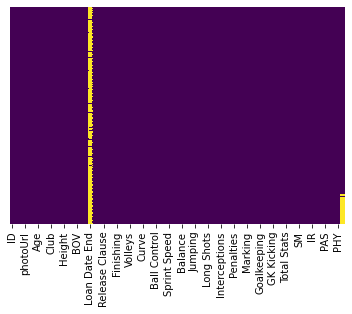

In [10]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [11]:
df.columns[df.isna().any()].tolist()

['Loan Date End', 'Hits']

In [12]:
df.loc[df['Loan Date End'].notnull()].head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
205,173731,G. Bale,Gareth Bale,https://cdn.sofifa.com/players/173/731/21_60.png,http://sofifa.com/player/173731/gareth-bale/21...,Wales,30,83,83,\n\n\n\nTottenham Hotspur,"Jun 30, 2021 On Loan",RW,185cm,82kg,Left,83,RW,"Sep 1, 2013","Jun 30, 2021",€35M,€200K,€0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3 ★,4★,Medium,Medium,4 ★,88,84,82,80,58,73,282
248,193105,A. Areola,Alphonse Areola,https://cdn.sofifa.com/players/193/105/21_60.png,http://sofifa.com/player/193105/alphonse-areol...,France,27,82,86,\n\n\n\nFulham,"Jun 30, 2021 On Loan",GK,195cm,94kg,Right,82,GK,"Jul 1, 2010","Jun 30, 2021",€32M,€71K,€0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3 ★,1★,Medium,Medium,2 ★,85,79,80,84,55,78,94
254,200888,Danilo Pereira,Danilo Luís Hélio Pereira,https://cdn.sofifa.com/players/200/888/21_60.png,http://sofifa.com/player/200888/danilo-luis-he...,Portugal,28,82,82,\n\n\n\nParis Saint-Germain,"Jun 30, 2021 On Loan","CDM, CM",188cm,83kg,Right,82,CDM,"Jul 2, 2015","Jun 30, 2021",€27M,€20K,€0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3 ★,3★,Medium,High,3 ★,66,63,72,73,80,85,285
302,216409,M. Politano,Matteo Politano,https://cdn.sofifa.com/players/216/409/21_60.png,http://sofifa.com/player/216409/matteo-politan...,Italy,26,81,81,\n\n\n\nNapoli,"Jun 30, 2021 On Loan","RM, RW, ST",171cm,67kg,Left,81,RM,"Jul 1, 2019","Jun 30, 2021",€28M,€105K,€0,350,80,76,40,79,75,399,83,79,77,76,84,423,84,82,89,81,87,329,78,51,77,41,82,324,63,38,76,77,70,79,121,63,29,29,48,11,12,6,8,11,1994,419,4 ★,4★,High,Medium,2 ★,83,77,78,84,42,55,93
306,223959,L. Torreira,Lucas Torreira,https://cdn.sofifa.com/players/223/959/21_60.png,http://sofifa.com/player/223959/lucas-torreira...,Uruguay,24,81,85,\n\n\n\nAtlético Madrid,"Jun 30, 2021 On Loan","CDM, CM",166cm,60kg,Right,82,CDM,"Jul 12, 2018","Jun 30, 2021",€33.5M,€74K,€0,336,71,61,59,80,65,373,77,70,72,75,79,401,76,72,85,78,90,354,78,52,83,67,74,359,86,83,68,74,48,78,240,80,83,77,39,5,5,13,7,9,2102,448,3 ★,3★,Medium,High,2 ★,74,67,75,79,79,74,194


In [13]:
#Replacing all Nan values with No
# Every players on loan is No
df["Loan Date End"].fillna("No", inplace=True)

In [14]:
# We converted  all Nan to No
df["Loan Date End"].unique()

array(['No', 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [15]:
# Replacing all values except No with Yes 
# Every players on loan is Yes
df["Loan Date End"]=df["Loan Date End"].apply(lambda x: "Yes" if len(x)>3 else "No",)

In [16]:
df["Loan Date End"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
# Change column name to 'loan' 
df.rename(columns={"Loan Date End": "Loan"}, inplace=True)

#### Handling missing values with Hits Columns

In [18]:
df["Hits"].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

You observe how values are numeric and alpha-numeric

In [19]:
df['Hits'] = df['Hits'].fillna(0)
df['Hits'].isnull().sum()

0

In [20]:
def hit_func(val):
    if "K" in str(val):
        val=val.replace("K","")
        return int(float(val)*1000)
    else:
        return int(val)

In [21]:
df['Hits'] = df["Hits"].apply(hit_func)

In [22]:
df['Hits'].unique()

array([ 771,  562,  150,  207,  595,  248,  246,  120, 1600,  130,  321,
        189,  175,   96,  118,  216,  212,  154,  205,  202,  339,  408,
        103,  332,   86,  173,  161,  396, 1100,  433,  242,  206,  177,
       1500,  198,  459,  117,  119,  209,   84,  187,  165,  203,   65,
        336,  126,  313,  124,  145,  538,  182,  101,   45,  377,   99,
        194,  403,  414,  593,  374,  245, 3200,  266,  299,  309,  215,
        265,  211,  112,  337,   70,  159,  688,  116,   63,  144,  123,
         71,  224,  113,  168,   61,   89,  137,  278,   75,  148,  176,
        197,  264,  214,  247,  402,  440, 1700, 2300,  171,  320,  657,
         87,  259,  200,  255,  253,  196,   60,   97,   85,  169,  256,
        132,  239,  166,  121,  109,   32,   46,  122,   48,  527,  199,
        282,   51, 1900,  642,  155,  323,  288,  497,  509,   79,   49,
        270,  511,   80,  128,  115,  156,  204,  143,  140,  152,  220,
        134,  225,   94,   74,  135,  142,   50,   

In [23]:
#  We equate the 0 values with mean values of the column since it is Nan initially
df[df["Hits"]==0]=int(df["Hits"].mean())

#### Cleaning  Club Column 

In [24]:
df['Club']=df["Club"].replace(["\n\n\n\n"],'', regex=True)

#### Checking Dupliactes

In [25]:
duplicates = df.duplicated()
print(df[duplicates])

       ID Name LongName photoUrl playerUrl Nationality  Age  ↓OVA  POT Club  \
16204  22   22       22       22        22          22   22    22   22   22   
16205  22   22       22       22        22          22   22    22   22   22   
16206  22   22       22       22        22          22   22    22   22   22   
16208  22   22       22       22        22          22   22    22   22   22   
16217  22   22       22       22        22          22   22    22   22   22   
...    ..  ...      ...      ...       ...         ...  ...   ...  ...  ...   
18974  22   22       22       22        22          22   22    22   22   22   
18975  22   22       22       22        22          22   22    22   22   22   
18976  22   22       22       22        22          22   22    22   22   22   
18977  22   22       22       22        22          22   22    22   22   22   
18978  22   22       22       22        22          22   22    22   22   22   

      Contract Positions Height Weight Preferred Fo

In [26]:
# Dropping duplicate columns
df.drop_duplicates(inplace=True)

In [27]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [ID, Name, LongName, photoUrl, playerUrl, Nationality, Age, ↓OVA, POT, Club, Contract, Positions, Height, Weight, Preferred Foot, BOV, Best Position, Joined, Loan, Value, Wage, Release Clause, Attacking, Crossing, Finishing, Heading Accuracy, Short Passing, Volleys, Skill, Dribbling, Curve, FK Accuracy, Long Passing, Ball Control, Movement, Acceleration, Sprint Speed, Agility, Reactions, Balance, Power, Shot Power, Jumping, Stamina, Strength, Long Shots, Mentality, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Defending, Marking, Standing Tackle, Sliding Tackle, Goalkeeping, GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes, Total Stats, Base Stats, W/F, SM, A/W, D/W, IR, PAC, SHO, PAS, DRI, DEF, PHY, Hits]
Index: []


#### Cleaning column Height

In [28]:
df["Height"].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm', 22],
      dtype=object)

You notice something odd here, we have 22 as a unique. Value can't be 22cm or 2'2, you should know something up

In [29]:
df[df["Height"]==22]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
16203,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


You observe all columns till have duplicates
Now, we drop the column

In [30]:
df.drop(index=16203, inplace=True)

In [31]:
df["Height"].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

We don't have 22 again as unique value

In [32]:
# Function will clean Column Height
def convert_height(val):
    if str(val).endswith("cm"):
        
        # Function will remove cm for series values
        s = [int(s) for s in re.findall(r'-?\d+\.?\d*', val)]
        
        return int(s[0])
        
    elif str(val).endswith("\""):
        
        # Since 1 foot=30.48cm and 1 inch= 2.54cm, we multiply first number instance by 30.48 and second instance by 2.54 
        # We add up and we have series values in cm
        
        s = [int(s) for s in re.findall(r'-?\d+\.?\d*', val)]
        answer_cm= int(float((s[0]*30.48)+(s[1]*2.54)))
        return answer_cm

In [33]:
df["Height"]=df['Height'].apply(convert_height)

In [34]:
df["Height"].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 162,
       201, 158, 161, 160, 203, 157, 156, 202, 159, 206, 155], dtype=int64)

In [35]:
df["Height"].isna().sum()

0

#### Cleaning Weight column

In [36]:
df["Weight"].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

We have two different weight SI units; kg and lbs

In [37]:
# Function will clean Column Weight
def convert_weight(val):
    if val.endswith("kg"):
        # Function will remove cm for series values
        s = [int(s) for s in re.findall(r'-?\d+\.?\d*', val)]
        return int(s[0])
        
    elif val.endswith("lbs"):
        # We add up and we have series values in kg
        s = [int(s) for s in re.findall(r'-?\d+\.?\d*', val)]
        answer_cm= s[0]*0.453592
        return int(answer_cm)

In [38]:
df['Weight']=df['Weight'].apply(convert_weight)

In [39]:
df['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52], dtype=int64)

In [40]:
df['Weight'].isna().sum()

0

#### Cleaning column Value

In [41]:
df['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [42]:
df['Value'] = df['Value'].str.replace('€','')

In [43]:
def convert_value(val):
    
    if 'M' in val:
        # We split val by space and we get a list in return
        x=float(val.split('M')[0])
        # After extracting number fron val, we multiply by 1000000
        return int(x*1000000)

    elif 'K' in val:
        x=float(val.split('K')[0])
        # After extracting number fron val, we multiply by 1000000
        return int(x*1000)
    else:
        return int(val)

In [44]:
df['Value']=df['Value'].apply(convert_value)

In [45]:
df['Value'].unique()

array([103500000,  63000000, 120000000, 129000000, 132000000, 111000000,
       120500000, 102000000, 185500000, 110000000, 113000000,  90500000,
        82000000,  17500000,  83500000,  33500000, 114500000,  78000000,
       103000000, 109000000,  92000000,  10000000,  76500000,  89500000,
        87500000,  79500000, 124000000, 114000000,  95000000,  92500000,
       105500000,  88500000,  85000000,  81500000,  26000000,  21000000,
        56000000,  67500000,  53000000,  36500000,  51000000,  65500000,
        46500000,  61500000,  72500000,  77500000,  43500000,  32500000,
        36000000,  32000000,  54000000,  49500000,  57000000,  66500000,
        74500000,  71500000, 121000000,  99000000,  67000000,  86500000,
        93500000,  70000000,  62000000,  66000000,  58000000,  44000000,
        81000000,  37000000,  14500000,  46000000,  47500000,  52500000,
        54500000,  34500000,  57500000,  51500000,  44500000,  55000000,
        48000000,  60500000,  63500000,  61000000, 

In [46]:
df["Value"].isna().sum()

0

#### Cleaning column Wage

In [47]:
df["Wage"].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

If you observe closely, you will observe some players earn in thousands of euros and hundreds of euros

We slice with caution here

In [48]:
df['Wage'] = df['Wage'].str.replace('€','')

In [49]:
# Function will clean Column Wage
def convert_wage(val):
    
    if "K" in val:
        value=val.split("K")[0]
        value= int(value)*1000
        return value
    else:
        value= int(val)

        return val

In [50]:
df['Wage']=df['Wage'].apply(convert_wage)

In [51]:
df["Wage"].unique()

array([560000, 220000, 125000, 370000, 270000, 240000, 250000, 160000,
       260000, 210000, 310000, 130000, 350000, 300000, 190000, 145000,
       195000, 100000, 140000, 290000, 82000, 110000, 230000, 155000,
       200000, 165000, 95000, 170000, 105000, 115000, 150000, 135000,
       55000, 58000, 81000, 34000, 120000, 59000, 90000, 65000, 56000,
       71000, 18000, 75000, 47000, 20000, 84000, 86000, 74000, 78000,
       27000, 68000, 85000, 25000, 46000, 83000, 54000, 79000, 175000,
       43000, 49000, 45000, 38000, 41000, 39000, 23000, 51000, 50000,
       87000, 30000, 14000, 69000, 31000, 64000, 53000, 35000, 21000,
       28000, 17000, 33000, 70000, 32000, 89000, 26000, 40000, 76000,
       72000, 48000, 36000, 29000, 60000, 16000, 37000, 24000, 52000, '0',
       62000, 73000, 63000, 19000, 1000, 66000, 80000, 12000, 2000, 42000,
       13000, '900', 57000, 77000, 61000, 22000, 67000, 44000, 15000,
       11000, 8000, '850', 10000, 88000, '500', 7000, 6000, 9000, 5000,
    

In [52]:
df["Wage"].isna().sum()

0

#### Cleaning the column Release clause 

In [53]:
df["Release Clause"].unique()

array(['€138.4M', '€75.9M', '€159.4M', ..., '€522K', '€370K', '€79K'],
      dtype=object)

In [54]:
df['Release Clause'] = df['Release Clause'].str.replace('€','')


In [55]:
def run(val):
    if 'M' in val:
        # We split val by space and we get a list in return
        x=float(val.split('M')[0])
        return int(x*1000000)

    elif 'K' in val:
       `# We split val by space and we get a list in return
        x=float(val.split('K')[0])
        return int(x*1000)
    else:
        return int(val)

SyntaxError: invalid syntax (<ipython-input-55-fd9c7d207f9f>, line 8)

In [ ]:
df["Release Clause"]=df['Release Clause'].apply(run)

In [ ]:
df["Release Clause"].unique()

In [ ]:
df["Release Clause"].isna().sum()

We have no problem Release Clause

#### Handling column Contract

In [ ]:
df.loc[:,["Contract","Joined"]]

In [ ]:
df["Contract"].unique()

In [ ]:
# Function create new column "Contract_end" for every player 
def convert_contract(val):
    # We split values into list by space
    val= val.split(" ")
    if 'Free' in val:
        return val[0]
    elif "Loan" in val:
        return val[2]
    elif "~" in val:
        return val[2]

#### Creating New Column "Contract_end"

 - Contract players have contract with parent club
 - Loan players have contract with parent team despite temporary borrowing
 - Free Players hae no club, no contract

In [ ]:
df['Contract_end']=df["Contract"].apply(convert_contract)

In [ ]:
df['Contract_end'].unique()

#### Creating new column "Contract_start"

In [56]:
df["Joined"].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Jul 16, 2014', ..., 'Sep 3, 2016',
       'May 28, 2018', 'Sep 30, 2019'], dtype=object)

In [57]:
# Function create new column "Contract_start" for every player 
def convert_contract(val):
    val= val.split(" ")
    return val[-1]

In [58]:
df["Contract_start"]= df["Joined"].apply(convert_contract)

In [59]:
df["Contract_start"].unique()

array(['2004', '2018', '2014', '2015', '2017', '2016', '2013', '2011',
       '2009', '2005', '2010', '2012', '2019', '2020', '2008', '2007',
       '2002', '2006', '2003', '1998'], dtype=object)

#### Creating Column Player Status

In [60]:
# Function create new column "Player Status" for every player 
def status(val):
    # We split values in list by space
    val= val.split(" ")
    if 'Free' in val:
        # We assign free to free players with no contract
        return "Free"
    elif "Loan" in val:
        # We assign Loan to Loan players with temporary club
        return "Loan"
    elif "~" in val:
        # We assign Contract to  players with  contract with parent club
        return "Contract"

In [61]:
df["Player Status"]=df["Contract"].apply(status)

In [62]:
df["Player Status"].unique()

array(['Contract', 'Loan', 'Free'], dtype=object)

In [63]:
df["Player Status"].isna().sum()

0

#### We have no null values, we are good here.

In [64]:
df[df["Player Status"]=="Contract"]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_start,Player Status
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",No,103500000,560000,138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2004,Contract
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",No,63000000,220000,75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,2018,Contract
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",No,120000000,125000,159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,2014,Contract
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",No,129000000,370000,161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,2015,Contract
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",No,132000000,270000,166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,2017,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,252210,P. Żuk,Paweł Żuk,https://cdn.sofifa.com/players/252/210/21_60.png,http://sofifa.com/player/252210/pawel-zuk/210006/,Poland,19,58,73,Wisła Płock,2020 ~ 2022,"RB, RM",177,68,Right,58,RB,"Jul 21, 2020",No,475000,550,494K,208,55,31,47,47,28,175,52,28,29,23,43,331,76,72,62,48,73,224,26,57,65,53,23,227,56,56,38,36,41,45,164,48,56,60,50,7,14,13,7,9,1379,305,3 ★,2★,Medium,Medium,1 ★,74,29,41,51,53,57,1,2020,Contract
16617,258609,A. Fouda,Aloys Fouda,https://cdn.sofifa.com/players/258/609/21_60.png,http://sofifa.com/player/258609/aloys-fouda/21...,Cameroon,20,58,70,Stade Malherbe Caen,2019 ~ 2024,LB,175,65,Right,58,LB,"Jul 1, 2019",No,475000,950,420K,213,51,28,48,58,28,214,52,31,34,50,47,319,66,62,58,58,75,229,37,57,58,46,31,231,

In [65]:
df[df["Player Status"]=="Free"]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_start,Player Status
289,230347,Welington Dano,Welington Kauê Dano Nascimento,https://cdn.sofifa.com/players/230/347/21_60.png,http://sofifa.com/player/230347/welington-kaue...,Brazil,20,81,81,No Club,Free,"LB, LM",178,69,Left,81,LB,"Jan 1, 2019",No,0,0,0,327,82,51,69,78,47,361,77,83,52,71,78,402,78,80,83,80,81,336,55,71,89,68,53,354,69,77,72,75,61,82,228,70,77,81,60,16,15,15,7,7,2068,436,4 ★,4★,Medium,Medium,1 ★,79,54,76,78,75,74,172,2019,Free
292,230225,Juiano Mestres,Juan Everton Mestres de Mesquita,https://cdn.sofifa.com/players/230/225/21_60.png,http://sofifa.com/player/230225/juan-everton-m...,Brazil,24,81,81,No Club,Free,"CB, CDM",181,82,Right,81,CB,"Jan 1, 2019",No,0,0,0,309,40,56,83,67,63,312,60,72,58,58,64,344,68,74,61,78,63,381,74,91,76,79,61,338,86,82,58,50,62,70,246,77,85,84,73,18,12,14,11,18,2003,413,3 ★,2★,High,Medium,1 ★,71,61,57,62,82,80,75,2019,Free
369,245299,J. Frendado,Jaime Nicolás Frendado,https://cdn.sofifa.com/players/245/299/21_60.png,http://sofifa.com/player/245299/jaime-nicolas-...,Uruguay,36,80,80,No Club,Free,"CB, CDM",181,82,Right,80,CB,"Aug 10, 2018",No,0,0,0,306,40,56,80,67,63,312,60,72,58,58,64,341,67,74,61,76,63,363,74,91,60,77,61,338,86,82,58,50,62,70,247,83,82,82,80,14,15,15,17,19,1987,408,3 ★,2★,High,Medium,1 ★,71,61,57,62,82,75,11,2018,Free
374,245294,J. Serendero,Jorge Ezequiel Serendero,https://cdn.sofifa.com/players/245/294/21_60.png,http://sofifa.com/player/245294/jorge-ezequiel...,Uruguay,32,80,80,No Club,Free,GK,190,85,Right,80,GK,"Aug 10, 2018",No,0,0,0,55,10,8,11,18,8,73,9,9,18,16,21,236,41,42,34,78,41,240,58,67,29,79,7,169,34,23,27,71,14,67,42,12,17,13,393,78,81,77,80,77,1208,435,2 ★,1★,Medium,Medium,1 ★,78,81,77,77,42,80,18,2018,Free
375,245308,M. Nérez,Mauro Evidio Nérez,https://cdn.sofifa.com/players/245/308/21_60.png,http://sofifa.com/player/245308/mauro-evidio-n...,Uruguay,32,80,80,No Club,Free,"LB, LM",178,69,Left,80,LB,"Aug 10, 2018",No,0,0,0,322,77,51,69,78,47,361,77,83,52,71,78,402,78,80,83,80,81,336,55,71,89,68,53,354,69,77,72,75,61,82,230,77,77,76,60,16,15,15,7,7,2065,436,4 ★,4★,Medium,Medium,1 ★,79,54,75,78,76,74,17,2018,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16305,251726,D. Sundaram,Diasha Sundaram,https://cdn.sofifa.com/players/251/726/21_60.png,http://sofifa.com/player/251726/diasha-sundara...,India,31,58,58,No Club,Free,CB,186,81,Right,58,CB,"Jul 12, 2019",No,0,0,0,216,42,54,55,52,13,202,33,38,32,51,48,274,58,61,41,57,57,297,63,67,60,77,30,222,60,51,28,28,55,59,173,57,59,57,56,11,15,10,14,6,1440,317,3 ★,2★,Low,High,1 ★,60,48,43,41,56,69,2,2019,Free
16309,251724,T. Agarwal,Taranjot Agarwal,https://cdn.sofifa.com/players/251/724/21_60.png,http://sofifa.com/player/251724/taranjot-agarw...,India,34,58,58,No Club,Free,"LM, LB",173,68,Left,58,LM,"Jul 12, 2019",No,0,0,0,253,54,51,50,51,47,276,57,60,48,51,60,341,71,68,75,51,76,302,58,67,67,58,52,264,48,59,51,57,49,60,157,48,57,52,71,16,14,15,12,14,1664,347,3 ★,3★,Medium,Medium,1 ★,69,52,53,60,54,59,1,2019,Free
16325,251733,P. Nagarajan,Palkesh Nagarajan,https://cdn.sof

In [66]:
df[df["Player Status"]=="Loan"]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_start,Player Status
205,173731,G. Bale,Gareth Bale,https://cdn.sofifa.com/players/173/731/21_60.png,http://sofifa.com/player/173731/gareth-bale/21...,Wales,30,83,83,Tottenham Hotspur,"Jun 30, 2021 On Loan",RW,185,82,Left,83,RW,"Sep 1, 2013",Yes,35000000,200000,0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3 ★,4★,Medium,Medium,4 ★,88,84,82,80,58,73,282,2013,Loan
248,193105,A. Areola,Alphonse Areola,https://cdn.sofifa.com/players/193/105/21_60.png,http://sofifa.com/player/193105/alphonse-areol...,France,27,82,86,Fulham,"Jun 30, 2021 On Loan",GK,195,94,Right,82,GK,"Jul 1, 2010",Yes,32000000,71000,0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3 ★,1★,Medium,Medium,2 ★,85,79,80,84,55,78,94,2010,Loan
254,200888,Danilo Pereira,Danilo Luís Hélio Pereira,https://cdn.sofifa.com/players/200/888/21_60.png,http://sofifa.com/player/200888/danilo-luis-he...,Portugal,28,82,82,Paris Saint-Germain,"Jun 30, 2021 On Loan","CDM, CM",188,83,Right,82,CDM,"Jul 2, 2015",Yes,27000000,20000,0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3 ★,3★,Medium,High,3 ★,66,63,72,73,80,85,285,2015,Loan
302,216409,M. Politano,Matteo Politano,https://cdn.sofifa.com/players/216/409/21_60.png,http://sofifa.com/player/216409/matteo-politan...,Italy,26,81,81,Napoli,"Jun 30, 2021 On Loan","RM, RW, ST",171,67,Left,81,RM,"Jul 1, 2019",Yes,28000000,105000,0,350,80,76,40,79,75,399,83,79,77,76,84,423,84,82,89,81,87,329,78,51,77,41,82,324,63,38,76,77,70,79,121,63,29,29,48,11,12,6,8,11,1994,419,4 ★,4★,High,Medium,2 ★,83,77,78,84,42,55,93,2019,Loan
306,223959,L. Torreira,Lucas Torreira,https://cdn.sofifa.com/players/223/959/21_60.png,http://sofifa.com/player/223959/lucas-torreira...,Uruguay,24,81,85,Atlético Madrid,"Jun 30, 2021 On Loan","CDM, CM",166,60,Right,82,CDM,"Jul 12, 2018",Yes,33500000,74000,0,336,71,61,59,80,65,373,77,70,72,75,79,401,76,72,85,78,90,354,78,52,83,67,74,359,86,83,68,74,48,78,240,80,83,77,39,5,5,13,7,9,2102,448,3 ★,3★,Medium,High,2 ★,74,67,75,79,79,74,194,2018,Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16315,234322,Park Byung Hyun,Byung Hyun Park,https://cdn.sofifa.com/players/234/322/21_60.png,http://sofifa.com/player/234322/byung-hyun-par...,Korea Republic,27,58,60,Sangju Sangmu FC,"Jun 23, 2021 On Loan",CB,184,83,Right,60,CB,"Feb 28, 2019",Yes,220000,1000,0,208,56,26,54,51,21,185,37,26,34,48,40,291,66,67,55,51,52,243,25,62,52,75,29,247,66,54,57,35,35,48,175,59,58,58,53,11,9,13,6,14,1402,306,2 ★,2★,Medium,High,1 ★,67,28,46,41,57,67,1,2019,Loan
16316,242258,H. Biggins,Harrison Biggins,https://cdn.sofifa.com/players/242/258/21_60.png,http://sofifa.com/player/242258/harrison-biggi...,England,24,58,63,Barrow,"Jun 30, 2021 On Loan",CM,175,68,Right,60,CAM,"Jul 4, 2017",Yes,300000,2000,0,222,39,46,36,62,39,258,59,41,36,60,62,308,66,65,63,58,

#### Removing star symbol from column W/F,SM and IP 

In [67]:
df.loc[:,["SM","IR",'W/F']]

,SM,IR,W/F
0,4★,5 ★,4 ★
1,5★,5 ★,4 ★
2,1★,3 ★,3 ★
3,4★,4 ★,5 ★
4,5★,5 ★,5 ★
...,...,...,...
16616,2★,1 ★,3 ★
16617,2★,1 ★,4 ★
16618,2★,1 ★,2 ★
16619,2★,1 ★,2 ★


In [68]:
def star_remove(val):
    s = [int(s) for s in re.findall(r'[0-9]+', val)]
    return s[0]

In [69]:
df['W/F']=df['W/F'].apply(star_remove)

In [70]:
df['IR']=df['IR'].apply(star_remove)

In [71]:
df['SM']=df['SM'].apply(star_remove)

In [72]:
df.loc[:,["SM","IR",'W/F']]

,SM,IR,W/F
0,4,5,4
1,5,5,4
2,1,3,3
3,4,4,5
4,5,5,5
...,...,...,...
16616,2,1,3
16617,2,1,4
16618,2,1,2
16619,2,1,2


In [73]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_start,Player Status
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",No,103500000,560000,138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2004,Contract
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",No,63000000,220000,75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,2018,Contract
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,"Jul 16, 2014",No,120000000,125000,159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2014,Contract
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",No,129000000,370000,161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,2015,Contract
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",No,132000000,270000,166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2017,Contract


#### Dropping columns

In [74]:
# We are dropping irrelevant columns
df.drop(["playerUrl","Contract"],axis=1, inplace=True)

In [75]:
df.head()

,ID,Name,LongName,photoUrl,Nationality,Age,↓OVA,POT,Club,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_start,Player Status
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",No,103500000,560000,138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2004,Contract
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",No,63000000,220000,75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,2018,Contract
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,Slovenia,27,91,93,Atlético Madrid,GK,188,87,Right,91,GK,"Jul 16, 2014",No,120000000,125000,159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2014,Contract
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",No,129000000,370000,161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,2015,Contract
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",No,132000000,270000,166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2017,Contract


In [76]:
# Renaming columns
df.rename(columns= {"photoUrl":"Photo URL","↓OVA": "Overall", "POT":"Potential","BOV":"Best Overall Rating", 
                    "W/F":"Weak Foot Ability", "SM":"Skill Move","A/W":"Work Rate",
                   "IR":"Injury Resistance", "PAC":"Pace", "SHO":"Shooting",
                   "PAS":"Passing", "DRI":"Dribbling","PHY":"Physicality", 
                    "Contract_end": "Contract Valid Till", "Contract_start":"Contract Start" }, inplace=True)

In [77]:
df.head()

,ID,Name,LongName,Photo URL,Nationality,Age,Overall,Potential,Club,Positions,Height,Weight,Preferred Foot,Best Overall Rating,Best Position,Joined,Loan,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,Weak Foot Ability,Skill Move,Work Rate,D/W,Injury Resistance,Pace,Shooting,Passing,Dribbling,DEF,Physicality,Hits,Contract Start,Player Status
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170,72,Left,93,RW,"Jul 1, 2004",No,103500000,560000,138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2004,Contract
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,Portugal,35,92,92,Juventus,"ST, LW",187,83,Right,92,ST,"Jul 10, 2018",No,63000000,220000,75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,2018,Contract
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,Slovenia,27,91,93,Atlético Madrid,GK,188,87,Right,91,GK,"Jul 16, 2014",No,120000000,125000,159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2014,Contract
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,Belgium,29,91,91,Manchester City,"CAM, CM",181,70,Right,91,CAM,"Aug 30, 2015",No,129000000,370000,161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,2015,Contract
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175,68,Right,91,LW,"Aug 3, 2017",No,132000000,270000,166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2017,Contract


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16384 entries, 0 to 16636
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   16384 non-null  int64 
 1   Name                 16384 non-null  object
 2   LongName             16384 non-null  object
 3   Photo URL            16384 non-null  object
 4   Nationality          16384 non-null  object
 5   Age                  16384 non-null  int64 
 6   Overall              16384 non-null  int64 
 7   Potential            16384 non-null  int64 
 8   Club                 16384 non-null  object
 9   Positions            16384 non-null  object
 10  Height               16384 non-null  int64 
 11  Weight               16384 non-null  int64 
 12  Preferred Foot       16384 non-null  object
 13  Best Overall Rating  16384 non-null  int64 
 14  Best Position        16384 non-null  object
 15  Joined               16384 non-null  object
 16  Loan

## From all indications from info above, we have cleaned the data peoperly.